# DATA EXPLORATION

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
app_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_merge.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PREV_CRE_AMT_RECIVABLE,PREV_CRE_AMT_TOTAL_RECEIVABLE,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,PREV_CRE_CNT_DRAWINGS_CURRENT,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,PREV_CRE_CNT_INSTALMENT_MATURE_CUM,PREV_CRE_NAME_CONTRACT_STATUS,PREV_CRE_SK_DPD,PREV_CRE_SK_DPD_DEF
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
app_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_merge.csv')
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,PREV_CRE_AMT_RECIVABLE,PREV_CRE_AMT_TOTAL_RECEIVABLE,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,PREV_CRE_CNT_DRAWINGS_CURRENT,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,PREV_CRE_CNT_INSTALMENT_MATURE_CUM,PREV_CRE_NAME_CONTRACT_STATUS,PREV_CRE_SK_DPD,PREV_CRE_SK_DPD_DEF
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,7968.609,7968.609,0.045455,2.387755,0.0,2.613636,19.547619,0.0,0.0,0.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA CLEANING

In [10]:
app_train.shape

(307511, 216)

In [11]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 216 entries, SK_ID_CURR to PREV_CRE_SK_DPD_DEF
dtypes: float64(159), int64(57)
memory usage: 506.8 MB


In [12]:
app_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,PREV_CRE_AMT_RECIVABLE,PREV_CRE_AMT_TOTAL_RECEIVABLE,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,PREV_CRE_CNT_DRAWINGS_CURRENT,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,PREV_CRE_CNT_INSTALMENT_MATURE_CUM,PREV_CRE_NAME_CONTRACT_STATUS,PREV_CRE_SK_DPD,PREV_CRE_SK_DPD_DEF
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,77934.000000,77934.000000,52930.000000,77934.000000,52930.000000,52930.000000,77934.000000,77934.000000,77934.000000,77934.000000
mean,278180.518577,0.080729,0.095213,0.341669,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,75101.100482,75101.983906,0.630731,1.704668,0.007689,2.022844,7.998155,0.078854,3.142326,0.027201
std,102790.175348,0.272419,0.293509,0.474297,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,112968.124486,112968.449495,0.928054,3.878826,0.050421,4.547485,11.244001,0.283815,37.823598,0.328724
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,-2930.232700,-2930.232700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,28552.217000,28552.217000,0.329670,0.268817,0.000000,0.136364,3.111111,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,105341.161250,105341.161250,0.833333,1.600000,0.000000,2.000000,10.975349,0.000000,0.000000,0.000000
max,456255.000000,1.000000,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,...,913096.600000,913096.600000,35.000000,118.250000,2.000000,118.250000,48.000000,6.000000,1342.263158,63.857143


In [13]:
app_train.CODE_GENDER.replace(2, app_train.CODE_GENDER.median(), inplace=True)

In [14]:
app_test.shape

(48744, 215)

In [15]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 215 entries, SK_ID_CURR to PREV_CRE_SK_DPD_DEF
dtypes: float64(159), int64(56)
memory usage: 80.0 MB


In [16]:
app_test.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,PREV_CRE_AMT_RECIVABLE,PREV_CRE_AMT_TOTAL_RECEIVABLE,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,PREV_CRE_CNT_DRAWINGS_CURRENT,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,PREV_CRE_CNT_INSTALMENT_MATURE_CUM,PREV_CRE_NAME_CONTRACT_STATUS,PREV_CRE_SK_DPD,PREV_CRE_SK_DPD_DEF
count,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,14513.000000,14513.000000,9094.000000,14513.000000,9094.000000,9094.000000,14513.000000,14513.000000,14513.000000,14513.000000
mean,277796.676350,0.009006,0.329600,0.337129,0.690505,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,66064.319615,66064.533687,0.507450,1.556694,0.006241,2.216222,6.267538,0.119715,1.978296,0.069726
std,103169.547296,0.094474,0.470073,0.472734,0.462290,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,103691.378755,103691.331350,0.707176,3.668968,0.044924,4.686199,9.574581,0.346063,30.288927,2.534385
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,-257.220000,-257.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.000000,0.060241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,14831.651000,14831.651000,0.269024,0.205882,0.000000,0.333333,2.500000,0.000000,0.000000,0.000000
75%,367555.500000,0.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,97019.190000,97019.190000,0.688542,1.454545,0.000000,2.400000,7.692308,0.000000,0.000000,0.000000
max,456250.000000,1.000000,1.000000,1.000000,1.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,...,820603.500000,820603.500000,17.000000,87.250000,2.000000,87.250000,48.000000,6.000000,801.645570,233.368421


In [17]:
print("Null columns \n", app_train.isna().sum())
print("\nDuplicated row: ", app_train.duplicated().sum())

Null columns 
 SK_ID_CURR                                 0
TARGET                                     0
NAME_CONTRACT_TYPE                         0
CODE_GENDER                                0
FLAG_OWN_CAR                               0
                                       ...  
PREV_CRE_CNT_DRAWINGS_POS_CURRENT     254581
PREV_CRE_CNT_INSTALMENT_MATURE_CUM    229577
PREV_CRE_NAME_CONTRACT_STATUS         229577
PREV_CRE_SK_DPD                       229577
PREV_CRE_SK_DPD_DEF                   229577
Length: 216, dtype: int64

Duplicated row:  0


In [18]:
print("Null columns \n", app_test.isna().sum())
print("\nDuplicated row: ", app_test.duplicated().sum())

Null columns 
 SK_ID_CURR                                0
NAME_CONTRACT_TYPE                        0
CODE_GENDER                               0
FLAG_OWN_CAR                              0
FLAG_OWN_REALTY                           0
                                      ...  
PREV_CRE_CNT_DRAWINGS_POS_CURRENT     39650
PREV_CRE_CNT_INSTALMENT_MATURE_CUM    34231
PREV_CRE_NAME_CONTRACT_STATUS         34231
PREV_CRE_SK_DPD                       34231
PREV_CRE_SK_DPD_DEF                   34231
Length: 215, dtype: int64

Duplicated row:  0


## DATA CLEANING

In [19]:
## function for looking precentage of missing values in df
def miss_percent(df):
    result = (df.isnull().sum().sum() / df.size) * 100
    return result

#function for looking precentage of missing values in columns
def in_col(df):
    percent = df.isnull().sum() / len(df)
    result_df = pd.DataFrame({'column_index': percent.index, 'percentage': percent.values})
    result_df = result_df.sort_values(by='percentage', ascending=False)

    return result_df

In [20]:
miss_percent(app_train)

25.93956590772965

In [21]:
train_miss = in_col(app_train)
train_miss.head(10)


,column_index,percentage
203,PREV_CRE_AMT_PAYMENT_CURRENT,0.828162
211,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,0.827876
210,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,0.827876
208,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,0.827876
198,PREV_CRE_AMT_DRAWINGS_ATM_CURRENT,0.827876
200,PREV_CRE_AMT_DRAWINGS_OTHER_CURRENT,0.827876
201,PREV_CRE_AMT_DRAWINGS_POS_CURRENT,0.827876
215,PREV_CRE_SK_DPD_DEF,0.746565
194,PREV_CRE_SK_ID_CURR,0.746565
195,PREV_CRE_MONTHS_BALANCE,0.746565


In [22]:
train_miss.column_index[train_miss.percentage > 0.7].to_list()

['PREV_CRE_AMT_PAYMENT_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_POS_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_ATM_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_ATM_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_OTHER_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_POS_CURRENT',
 'PREV_CRE_SK_DPD_DEF',
 'PREV_CRE_SK_ID_CURR',
 'PREV_CRE_MONTHS_BALANCE',
 'PREV_CRE_AMT_BALANCE',
 'PREV_CRE_AMT_CREDIT_LIMIT_ACTUAL',
 'PREV_CRE_AMT_DRAWINGS_CURRENT',
 'PREV_CRE_AMT_INST_MIN_REGULARITY',
 'PREV_CRE_AMT_RECEIVABLE_PRINCIPAL',
 'PREV_CRE_AMT_PAYMENT_TOTAL_CURRENT',
 'PREV_CRE_AMT_RECIVABLE',
 'PREV_CRE_AMT_TOTAL_RECEIVABLE',
 'PREV_CRE_CNT_DRAWINGS_CURRENT',
 'PREV_CRE_CNT_INSTALMENT_MATURE_CUM',
 'PREV_CRE_NAME_CONTRACT_STATUS',
 'PREV_CRE_SK_DPD',
 'BURE_Blc_STATUS__4',
 'BURE_Blc_STATUS__0',
 'BURE_Blc_MONTHS_BALANCE',
 'BURE_Blc_STATUS__1',
 'BURE_Blc_STATUS__3',
 'BURE_Blc_STATUS__2',
 'BURE_Blc_STATUS__5',
 'BURE_Blc_STATUS__C',
 'BURE_Blc_STATUS__X']

In [23]:
app_train.drop(columns=train_miss.column_index[train_miss.percentage > 0.7].to_list(), inplace=True)
app_train.shape

(307511, 185)

In [24]:
for col in train_miss.column_index[(train_miss.percentage > 0) & (train_miss.percentage <= 0.7)].to_list():
    app_train[col] = app_train[col].fillna(app_train[col].median())

In [25]:
app_train.isna().sum().sum()

0

In [26]:
miss_percent(app_test)

22.050952484551466

In [27]:
test_miss = in_col(app_test)
test_miss.head(10)

,column_index,percentage
210,PREV_CRE_CNT_DRAWINGS_POS_CURRENT,0.813433
209,PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT,0.813433
197,PREV_CRE_AMT_DRAWINGS_ATM_CURRENT,0.813433
207,PREV_CRE_CNT_DRAWINGS_ATM_CURRENT,0.813433
199,PREV_CRE_AMT_DRAWINGS_OTHER_CURRENT,0.813433
200,PREV_CRE_AMT_DRAWINGS_POS_CURRENT,0.813433
202,PREV_CRE_AMT_PAYMENT_CURRENT,0.813331
214,PREV_CRE_SK_DPD_DEF,0.702261
194,PREV_CRE_MONTHS_BALANCE,0.702261
195,PREV_CRE_AMT_BALANCE,0.702261


In [28]:
test_miss.column_index[test_miss.percentage > 0.7].to_list()

['PREV_CRE_CNT_DRAWINGS_POS_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_OTHER_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_ATM_CURRENT',
 'PREV_CRE_CNT_DRAWINGS_ATM_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_OTHER_CURRENT',
 'PREV_CRE_AMT_DRAWINGS_POS_CURRENT',
 'PREV_CRE_AMT_PAYMENT_CURRENT',
 'PREV_CRE_SK_DPD_DEF',
 'PREV_CRE_MONTHS_BALANCE',
 'PREV_CRE_AMT_BALANCE',
 'PREV_CRE_AMT_CREDIT_LIMIT_ACTUAL',
 'PREV_CRE_AMT_DRAWINGS_CURRENT',
 'PREV_CRE_AMT_INST_MIN_REGULARITY',
 'PREV_CRE_SK_ID_CURR',
 'PREV_CRE_AMT_PAYMENT_TOTAL_CURRENT',
 'PREV_CRE_AMT_RECIVABLE',
 'PREV_CRE_AMT_TOTAL_RECEIVABLE',
 'PREV_CRE_CNT_DRAWINGS_CURRENT',
 'PREV_CRE_AMT_RECEIVABLE_PRINCIPAL',
 'PREV_CRE_CNT_INSTALMENT_MATURE_CUM',
 'PREV_CRE_NAME_CONTRACT_STATUS',
 'PREV_CRE_SK_DPD']

In [29]:
app_test.drop(columns=test_miss.column_index[test_miss.percentage > 0.7].to_list(), inplace=True)
app_test.shape

(48744, 193)

In [30]:
for col in test_miss.column_index[(test_miss.percentage > 0) & (test_miss.percentage <= 0.7)].to_list():
    app_test[col] = app_test[col].fillna(app_test[col].median())

In [139]:
app_test.isna().sum().sum()

0

In [31]:
# app_train.to_csv("final_train.csv", index=False)
# app_test.to_csv("final_test.csv", index=False)

# DATA VISUALIZATION

In [32]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.set_theme(context="talk")
sns.set_style("whitegrid", {'axes.edgecolor': '.6','axes.grid': False,'xtick.bottom': True,'ytick.left': True})

In [33]:
for col in app_train.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

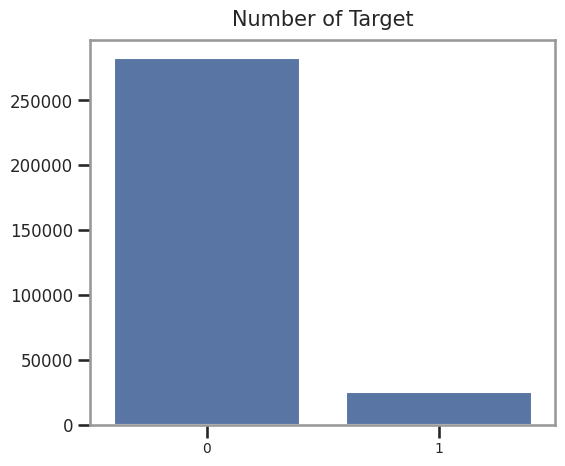

In [34]:
sns.countplot(x='TARGET', data=app_train)
plt.title("Number of Target", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

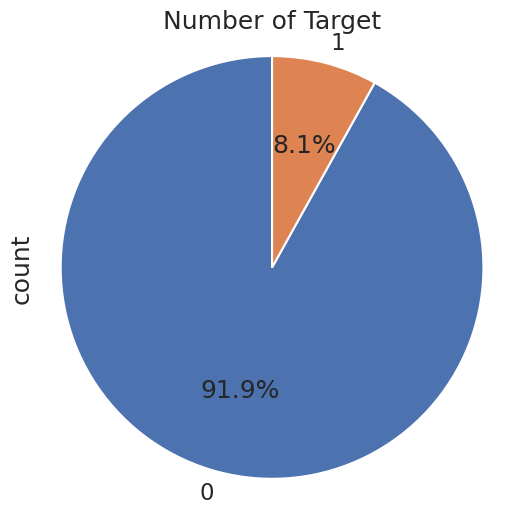

In [35]:
number_of_target = app_train['TARGET'].value_counts()

plt.figure(figsize=(6, 6))
number_of_target.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Number of Target')
plt.axis('equal')
plt.show()

In [36]:
app_train.CODE_GENDER.value_counts()

CODE_GENDER
0    202452
1    105059
Name: count, dtype: int64

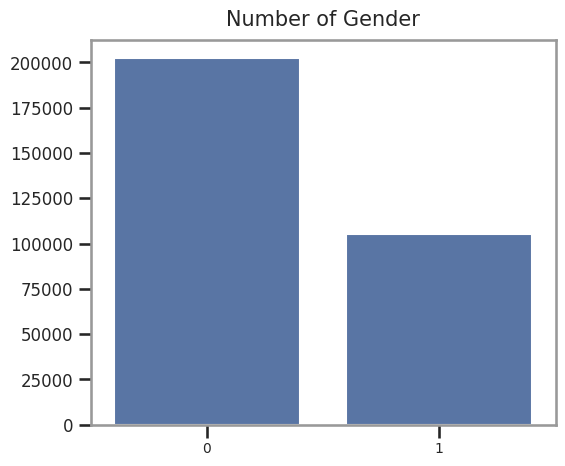

In [37]:
sns.countplot(x='CODE_GENDER', data=app_train)
plt.title("Number of Gender", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

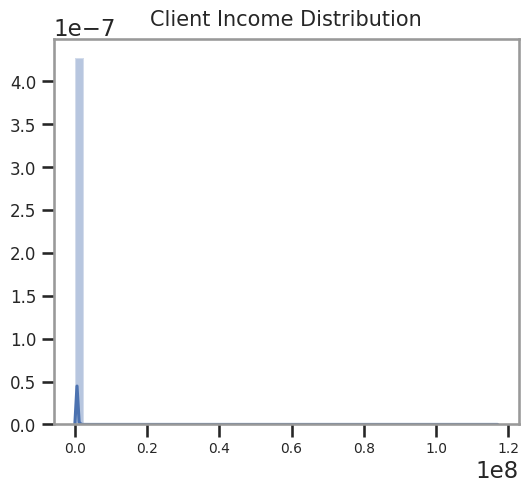

In [38]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])
plt.title("Client Income Distribution", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

there may be outliers that make the data distribution less visible.

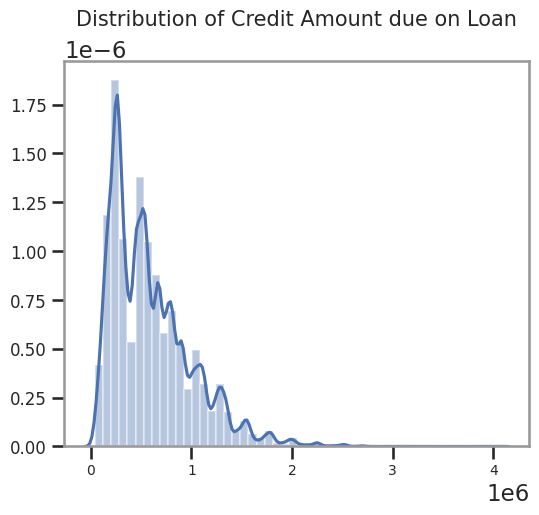

In [39]:
sns.distplot(app_train['AMT_CREDIT'])
plt.title("Distribution of Credit Amount due on Loan", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

The number of client credits is mostly below 1000000

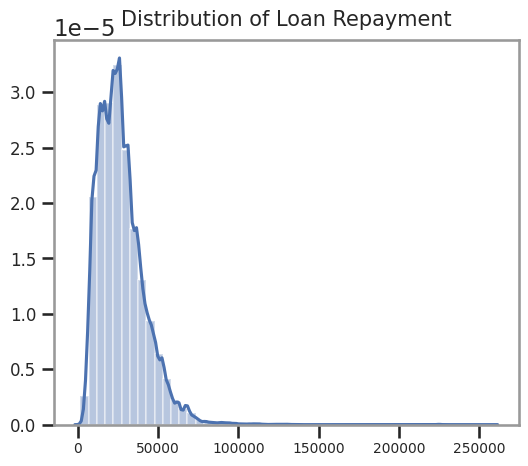

In [40]:
sns.distplot(app_train['AMT_ANNUITY'])
plt.title("Distribution of Loan Repayment", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

The average client only pays a balance of no more than 50000.

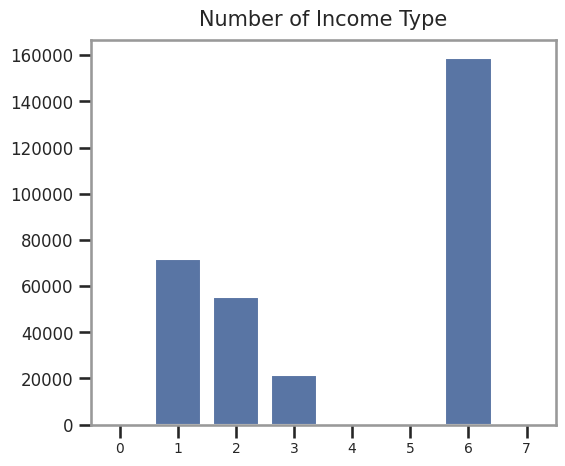

In [41]:
sns.countplot(x='NAME_INCOME_TYPE', data=app_train)
plt.title("Number of Income Type", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [42]:
app_train.NAME_INCOME_TYPE.value_counts().sort_index()

NAME_INCOME_TYPE
0        10
1     71617
2     55362
3     21703
4        18
5        22
6    158774
7         5
Name: count, dtype: int64

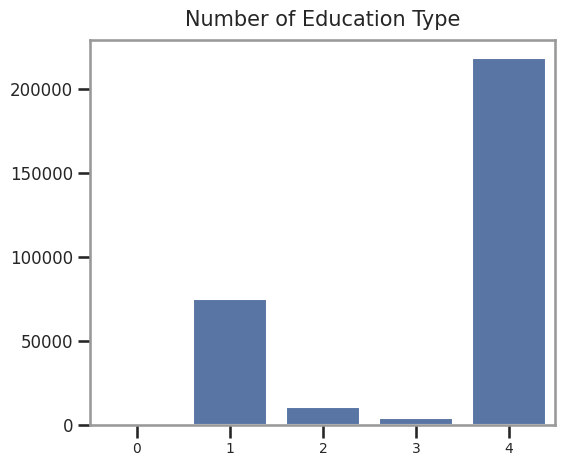

In [43]:

sns.countplot(x='NAME_EDUCATION_TYPE', data=app_train)
plt.title("Number of Education Type", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()


0 is Academic Degree
1 is Lower Secondary
2 is Incomplete Higher
3 is Higher Education
4 is Secondary Special
Clients who make loans mostly have a Secondary Special education background with a total of 218390 and the least from an academic degree education as many as 163 clients.

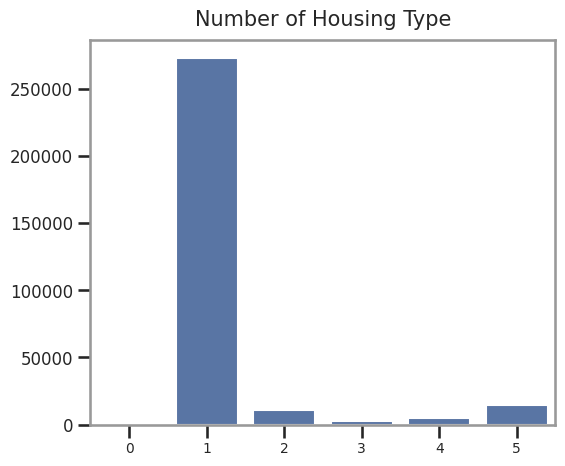

In [44]:
sns.countplot(x='NAME_HOUSING_TYPE', data=app_train)
plt.title("Number of Housing Type", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

0 is Co-op Apartment
1 is House/Apartment
2 is Municipal Apartment
3 is Office Apartment
4 is Rented Apartment
5 is With Parents
Clients who made the most loans stayed in houses/apartments with a total of 272869 and the fewest stayed in Co-op Apartments as many as 1123 clients.

In [45]:
age_0 = app_train.DAYS_BIRTH[app_train.TARGET == 0].values/-365
age_1 = app_train.DAYS_BIRTH[app_train.TARGET == 1].values/-365

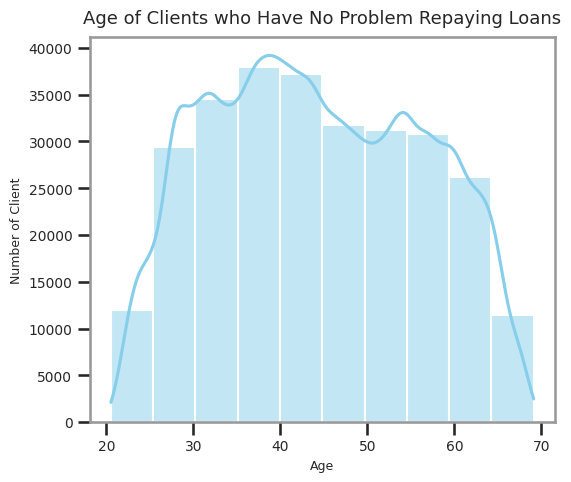

In [46]:
sns.histplot(age_0, bins=10, kde=True, color='skyblue')
plt.title("Age of Clients who Have No Problem Repaying Loans", loc="center", fontsize=13, pad=10)
plt.ylabel("Number of Client", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

Clients who have no payments dificulties are client in the range of 35 - 45 years

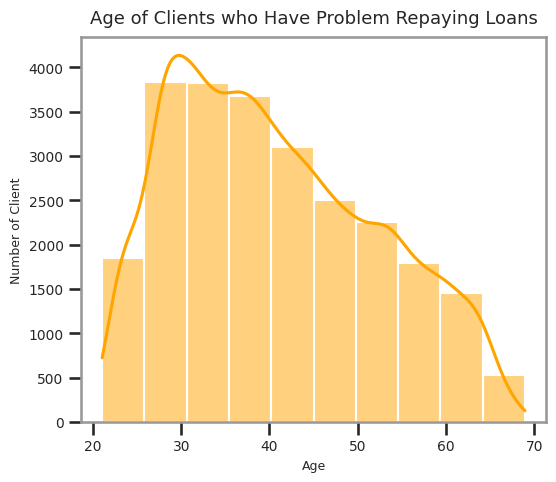

In [47]:
sns.histplot(age_1, bins=10, kde=True, color='orange')
plt.title("Age of Clients who Have Problem Repaying Loans", loc="center", fontsize=13, pad=10)
plt.ylabel("Number of Client", fontsize=9)
plt.xlabel("Age", fontsize=9)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.show()

Clients who have payments dificulties are client in the range of 25 - 35 years

Text(0.5, 1.0, 'distribution of age')

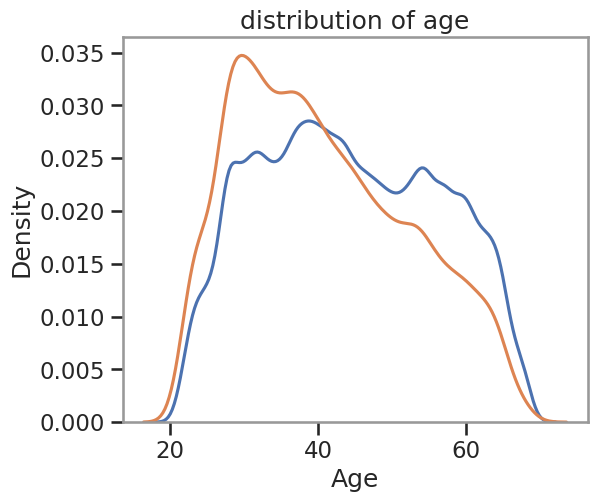

In [48]:
sns.kdeplot(app_train.loc[app_train['TARGET']==0, 'DAYS_BIRTH'].abs()/365, label='target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'DAYS_BIRTH'].abs()/365, label='target == 1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('distribution of age')

The results show that younger people are less likely to repay their loans.

In [49]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # hitung persentase target=1 berdasarkan masing-masing column
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1, palette="Set2")

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc, palette="Set2")

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

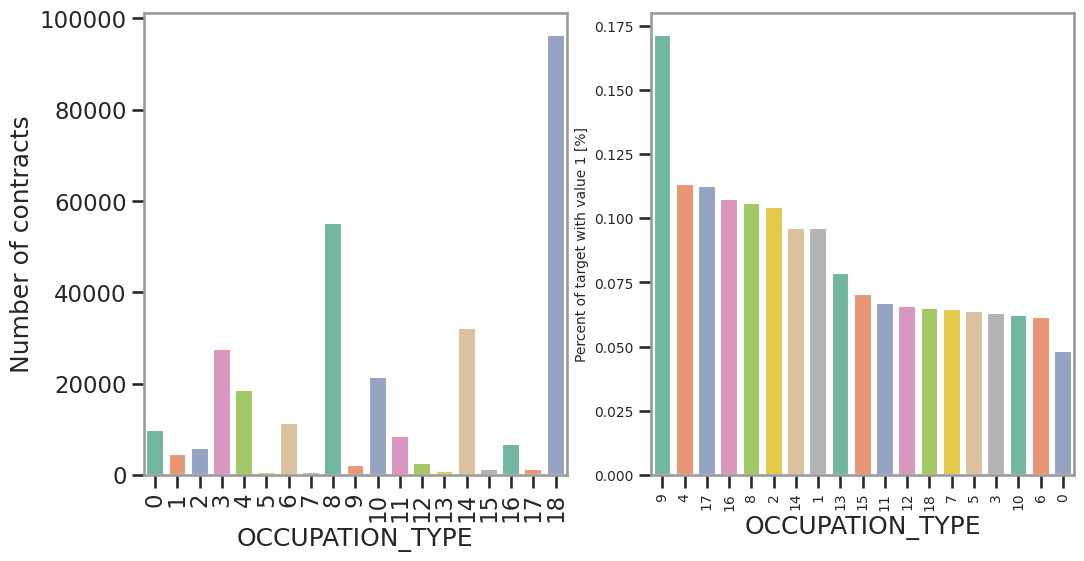

In [50]:
# kemampuan kredit berdasarkan pekerjaan
plot_stats('OCCUPATION_TYPE',True, True)

from the results it is known:
- the majority of people who apply for loans are laborers
- when viewed from the ability to repay loans, people with low skill laborers' employment status have a higher default rate than others.

Recomendation
Put a limit on the age that can take a loan, between 30 - 50 so that loan repayment can be smoother
If there are underage clients making loans, provide special conditions so that loan payments can be made immediately.
For clients who have income only as casual workers, please give the option to make a loan but with a certain loan limit.

# MODELLING

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

## FEATURE SELECTION USING K-BEST

In [42]:
app_train.shape

(307511, 185)

In [43]:
for col in app_train.columns[app_train.lt(0).any()]:
    app_train[col] = app_train[col].abs()

In [44]:
x = app_train.drop(columns=['TARGET', 'SK_ID_CURR'], axis=1)
y = app_train['TARGET']

In [45]:
print(x.shape)
print(y.shape)

(307511, 183)
(307511,)


In [46]:
app_train.size

56889535

In [47]:
selection = SelectKBest(score_func=chi2, k=10)
fitting = selection.fit(x,y)
scores = pd.DataFrame(fitting.scores_)
columndf = pd.DataFrame(x.columns)
scoring_feature = pd.concat([columndf, scores], axis = 1)
scoring_feature.columns = ['Features', 'Score']
scoring_feature.sort_values(by=['Score'], ascending=False).head(30)

,Features,Score
129,BURE_AMT_CREDIT_SUM,2.500367e+08
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
165,PREV_DAYS_LAST_DUE_1ST_VERSION,3.773946e+07
166,PREV_DAYS_LAST_DUE,3.765372e+07
167,PREV_DAYS_TERMINATION,2.868925e+07
138,PREV_AMT_APPLICATION,1.809400e+07
127,BURE_AMT_CREDIT_MAX_OVERDUE,1.680393e+07
141,PREV_AMT_GOODS_PRICE,1.100917e+07


Feature selection using Select Kbest method on train data. Features used in the model are only 30 based on the order of the highest score.

## BALANCING DATA

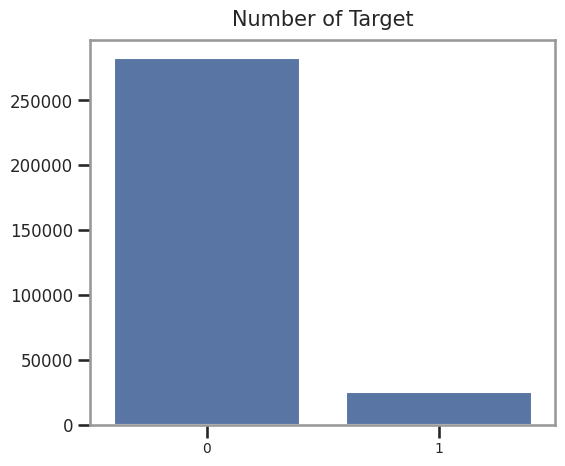

In [48]:
sns.countplot(x='TARGET', data=app_train)
plt.title("Number of Target", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [49]:
y.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

## Oversampling

In [50]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x,y)

In [51]:
print(x_ros.shape)
print(y_ros.shape)

(565372, 183)
(565372,)


In [52]:
y_ros.value_counts()

TARGET
1    282686
0    282686
Name: count, dtype: int64

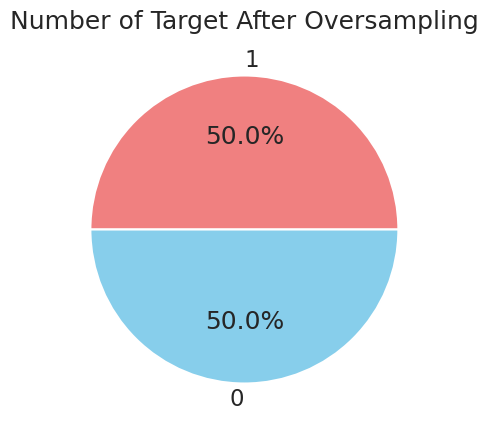

In [53]:
y_ros.value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Number of Target After Oversampling')
plt.ylabel(None)
plt.show()

## Undersampling

In [54]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x,y)

In [55]:
print(x_rus.shape)
print(y_rus.shape)

(49650, 183)
(49650,)


In [56]:
y_rus.value_counts()

TARGET
0    24825
1    24825
Name: count, dtype: int64

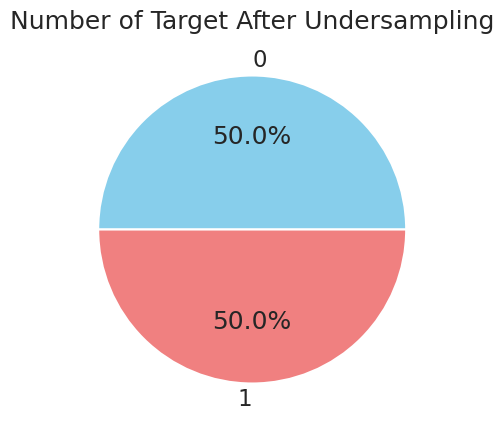

In [57]:
y_rus.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Number of Target After Undersampling')
plt.ylabel(None)
plt.show()

Split Data

In [58]:
scoring_feature.sort_values(by='Score', ascending=False).Features.head(30).to_list()

['BURE_AMT_CREDIT_SUM',
 'DAYS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'PREV_DAYS_LAST_DUE_1ST_VERSION',
 'PREV_DAYS_LAST_DUE',
 'PREV_DAYS_TERMINATION',
 'PREV_AMT_APPLICATION',
 'BURE_AMT_CREDIT_MAX_OVERDUE',
 'PREV_AMT_GOODS_PRICE',
 'PREV_AMT_CREDIT',
 'PREV_AMT_DOWN_PAYMENT',
 'BURE_AMT_CREDIT_SUM_OVERDUE',
 'BURE_AMT_CREDIT_SUM_LIMIT',
 'PREV_DAYS_FIRST_DRAWING',
 'BURE_AMT_CREDIT_SUM_DEBT',
 'PREV_INST_AMT_PAYMENT',
 'PREV_DAYS_FIRST_DUE',
 'DAYS_BIRTH',
 'PREV_AMT_ANNUITY',
 'PREV_INST_AMT_INSTALMENT',
 'BURE_SK_ID_BUREAU',
 'AMT_INCOME_TOTAL',
 'DAYS_REGISTRATION',
 'BURE_DAYS_CREDIT_ENDDATE',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'BURE_DAYS_CREDIT',
 'PREV_SELLERPLACE_AREA',
 'BURE_DAYS_CREDIT_UPDATE']

Oversampling

In [59]:
x_ros = x_ros[scoring_feature.sort_values(by='Score', ascending=False).Features.head(30).to_list()]

In [60]:
# split data
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.2, random_state=42)

In [160]:
print(X_train_ros.shape, X_test_ros.shape)
print(y_train_ros.shape, y_test_ros.shape)

(452297, 30) (113075, 30)
(452297,) (113075,)


Undersampling

In [61]:
x_rus = x_rus[scoring_feature.sort_values(by='Score', ascending=False).Features.head(30).to_list()]

In [62]:
# split data
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [63]:
print(X_train_rus.shape, X_test_rus.shape)
print(y_train_rus.shape, y_test_rus.shape)

(39720, 30) (9930, 30)
(39720,) (9930,)


## DATA SCALING

Oversampling

In [64]:
scaler = StandardScaler()
X_train_ros = scaler.fit_transform(X_train_ros)
X_test_ros = scaler.transform(X_test_ros)

Undersampling

In [65]:
X_train_rus = scaler.fit_transform(X_train_rus)
X_test_rus = scaler.transform(X_test_rus)

# BUILD MODEL AND EVALUATION

## Oversampling

## LR

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_ros, y_train_ros)
joblib.dump(lr, 'lr_model.pkl')

['lr_model.pkl']

In [67]:
y_lr = lr.predict(X_test_ros)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_ros, y_lr)
precision = precision_score(y_test_ros, y_lr)
recall = recall_score(y_test_ros, y_lr)
f1 = f1_score(y_test_ros, y_lr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6204554499226177
Precision: 0.6168748713020797
Recall: 0.6358265975698191
F1-score: 0.6262073770848757


In [69]:
from sklearn.metrics import roc_auc_score

In [70]:
y_pred_proba = lr.predict_proba(X_test_ros)[:, 1]

roc_auc = roc_auc_score(y_test_ros, y_pred_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.6612795334139536


Confusion Matrix:
[[34209 22327]
 [20590 35949]]


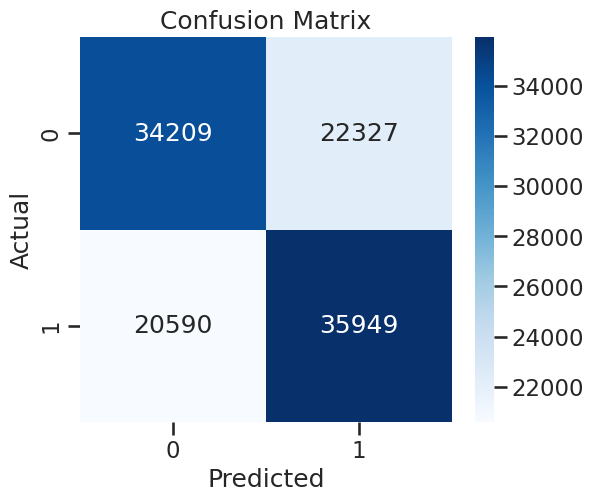

In [71]:
cm = confusion_matrix(y_test_ros, y_lr)

print("Confusion Matrix:")
print(cm)

fmt = '.0f'

sns.heatmap(cm, annot=True, cmap='Blues', fmt=fmt)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_ros, y_train_ros)
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [73]:
y_knn = knn.predict(X_test_ros)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_ros, y_knn)
precision = precision_score(y_test_ros, y_knn)
recall = recall_score(y_test_ros, y_knn)
f1 = f1_score(y_test_ros, y_knn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8692195445500773
Precision: 0.794224182886781
Recall: 0.9966748615999576
F1-score: 0.884006588752059


In [75]:
y_pred_proba = knn.predict_proba(X_test_ros)[:, 1]

roc_auc = roc_auc_score(y_test_ros, y_pred_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.948386386139634


Confusion Matrix:
[[41936 14600]
 [  188 56351]]


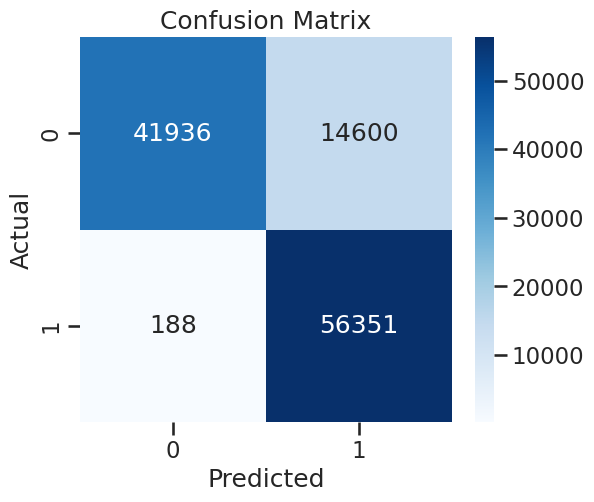

In [76]:
cm = confusion_matrix(y_test_ros, y_knn)

print("Confusion Matrix:")
print(cm)

fmt = '.0f'

sns.heatmap(cm, annot=True, cmap='Blues', fmt=fmt)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## DT

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train_ros, y_train_ros)
joblib.dump(dt, 'dt_model.pkl')

['dt_model.pkl']

In [78]:
y_dt = dt.predict(X_test_ros)

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_ros, y_dt)
precision = precision_score(y_test_ros, y_dt)
recall = recall_score(y_test_ros, y_dt)
f1 = f1_score(y_test_ros, y_dt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9500950696440416
Precision: 0.909276593007173
Recall: 0.9999646261872336
F1-score: 0.9524667907713301


In [80]:
y_pred_proba = dt.predict_proba(X_test_ros)[:, 1]

roc_auc = roc_auc_score(y_test_ros, y_pred_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.9500937465165685


Confusion Matrix:
[[50895  5641]
 [    2 56537]]


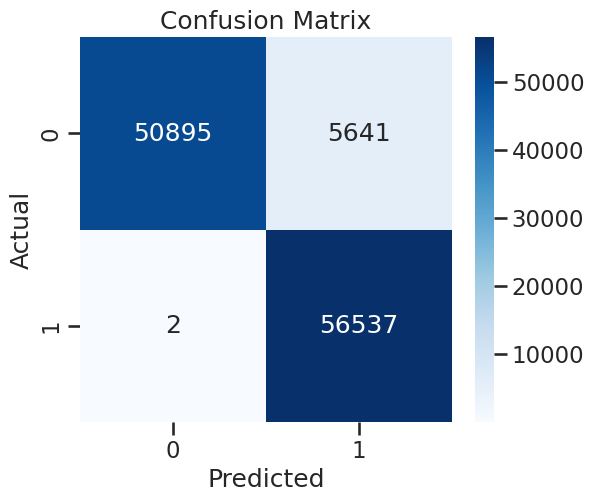

In [81]:
cm = confusion_matrix(y_test_ros, y_dt)

print("Confusion Matrix:")
print(cm)

fmt = '.0f'

sns.heatmap(cm, annot=True, cmap='Blues', fmt=fmt)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Undersampling

## LR

In [82]:
from sklearn.linear_model import LogisticRegression

lr_rus = LogisticRegression()
lr_rus.fit(X_train_rus, y_train_rus)
joblib.dump(lr, 'lr_rus_model.pkl')

['lr_rus_model.pkl']

In [83]:
y_lr_rus = lr.predict(X_test_rus)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_rus, y_lr_rus)
precision = precision_score(y_test_rus, y_lr_rus)
recall = recall_score(y_test_rus, y_lr_rus)
f1 = f1_score(y_test_rus, y_lr_rus)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.618932527693857
Precision: 0.61491042188403
Recall: 0.6413502109704642
F1-score: 0.6278520849724626


In [85]:
from sklearn.metrics import roc_auc_score

In [86]:
y_pred_proba = lr.predict_proba(X_test_rus)[:, 1]

roc_auc = roc_auc_score(y_test_rus, y_pred_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.6601744970129302


Confusion Matrix:
[[2954 1999]
 [1785 3192]]


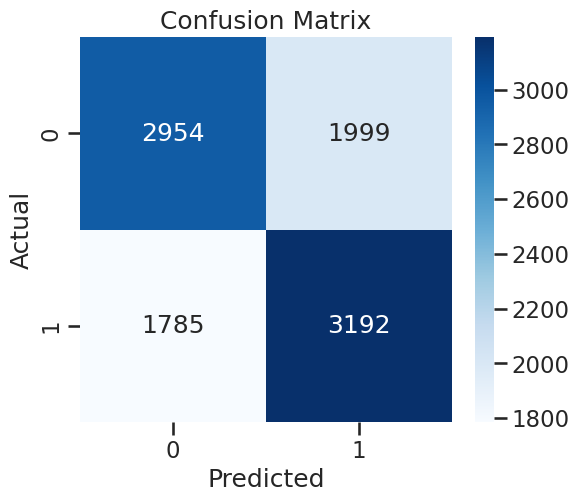

In [87]:
cm = confusion_matrix(y_test_rus, y_lr_rus)

print("Confusion Matrix:")
print(cm)

fmt = '.0f'

sns.heatmap(cm, annot=True, cmap='Blues', fmt=fmt)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_rus, y_train_rus)
joblib.dump(knn, 'knn_rus_model.pkl')

['knn_rus_model.pkl']

In [89]:
y_knn_rus = knn.predict(X_test_rus)

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_rus, y_knn_rus)
precision = precision_score(y_test_rus, y_knn_rus)
recall = recall_score(y_test_rus, y_knn_rus)
f1 = f1_score(y_test_rus, y_knn_rus)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5665659617321249
Precision: 0.5650996324240666
Recall: 0.586899738798473
F1-score: 0.5757934161245811


In [91]:
from sklearn.metrics import roc_auc_score
y_pred_proba = knn.predict_proba(X_test_rus)[:, 1]

roc_auc = roc_auc_score(y_test_rus, y_pred_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.5885604976106321


Confusion Matrix:
[[2705 2248]
 [2056 2921]]


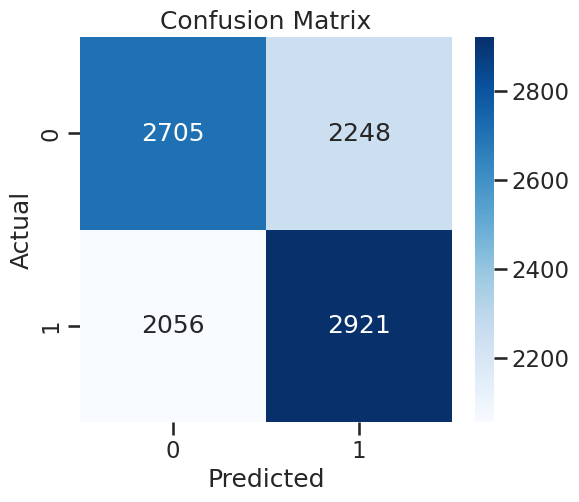

In [92]:
cm = confusion_matrix(y_test_rus, y_knn_rus)

print("Confusion Matrix:")
print(cm)

fmt = '.0f'

sns.heatmap(cm, annot=True, cmap='Blues', fmt=fmt)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## DT

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train_rus, y_train_rus)
joblib.dump(dt, 'dt_rus_model.pkl')

['dt_rus_model.pkl']

In [94]:
y_dt = dt.predict(X_test_rus)

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_rus, y_dt)
precision = precision_score(y_test_rus, y_dt)
recall = recall_score(y_test_rus, y_dt)
f1 = f1_score(y_test_rus, y_dt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5427995971802618
Precision: 0.5430372267086863
Recall: 0.5539481615430982
F1-score: 0.5484384324646906


In [96]:
from sklearn.metrics import roc_auc_score
y_pred_proba = dt.predict_proba(X_test_rus)[:, 1]

roc_auc = roc_auc_score(y_test_rus, y_pred_proba)
print("ROC AUC:", roc_auc)

ROC AUC: 0.5427725867275355


Confusion Matrix:
[[2633 2320]
 [2220 2757]]


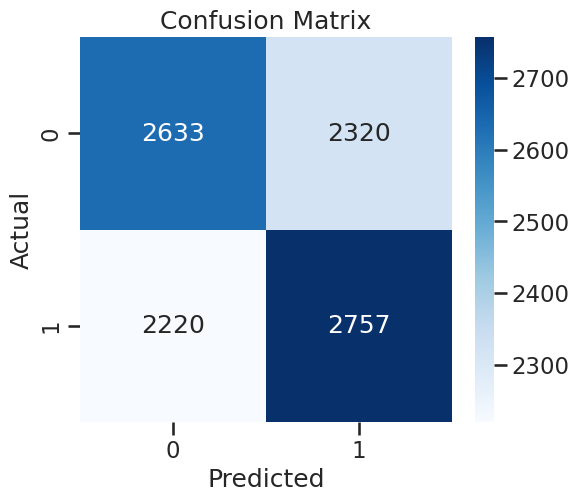

In [97]:
cm = confusion_matrix(y_test_rus, y_dt)

print("Confusion Matrix:")
print(cm)

fmt = '.0f'

sns.heatmap(cm, annot=True, cmap='Blues', fmt=fmt)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Oversampling to Test in App Train

In [98]:
predicted_target = y_knn

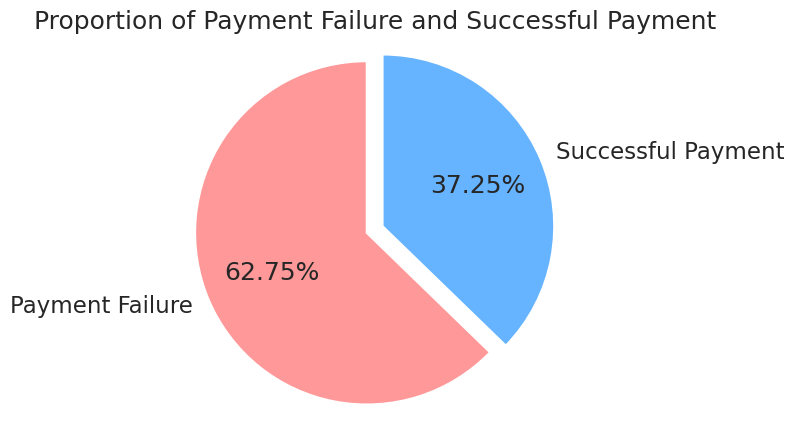

In [99]:
# Define variables
failed_payments = (predicted_target == 1).sum()
successful_payments = (predicted_target == 0).sum()

# Calculate percentages
percentage_failed_payments = (failed_payments / len(predicted_target)) * 100
percentage_successful_payments = (successful_payments / len(predicted_target)) * 100

# Define labels and sizes
labels = ['Payment Failure', 'Successful Payment']
sizes = [percentage_failed_payments, percentage_successful_payments]

# Define colors
colors = ['#ff9999', '#66b3ff']

# Define wedge explosion
explode = (0.1, 0)

# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Payment Failure and Successful Payment')
plt.show()

## Undersampling to Test in App Train

In [100]:
predicted_target1 = y_knn_rus
predicted_target1

array([0, 0, 0, ..., 0, 1, 1])

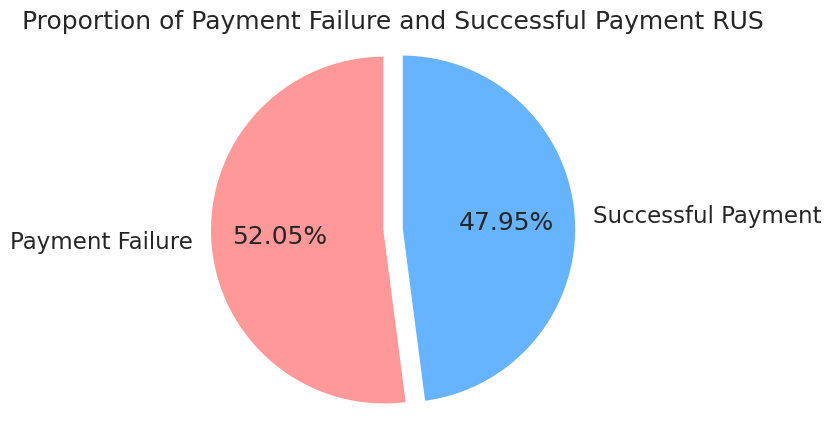

In [101]:
# Define variables
failed_payments = (predicted_target1 == 1).sum()
successful_payments = (predicted_target1 == 0).sum()

# Calculate percentages
percentage_failed_payments = (failed_payments / len(predicted_target1)) * 100
percentage_successful_payments = (successful_payments / len(predicted_target1)) * 100

# Define labels and sizes
labels = ['Payment Failure', 'Successful Payment']
sizes = [percentage_failed_payments, percentage_successful_payments]

# Define colors
colors = ['#ff9999', '#66b3ff']

# Define wedge explosion
explode = (0.1, 0)

# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Payment Failure and Successful Payment RUS')
plt.show()

Of the 3 models used, the KNN model is the best model with ROC-AUC 0.94 and Precission in numbers 0.86, besides that this is very important because when tested on new data the results are not overfitt, I concluded so because I had done trying of 2 other model to new data and the results were not normal.

#HYPERPARAMETER TUNING

## Oversampling

In [102]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train_ros and y_train_ros are defined

param_grid = {
    # ... your parameter grid
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

# Fit the grid search with your training data
grid_search.fit(X_train_ros, y_train_ros)  # Added this line

with tqdm(total=len(grid_search.cv_results_['params'])) as pbar:
    for params in grid_search.cv_results_['params']:
        knn_model = KNeighborsClassifier(**params)
        knn_model.fit(X_train_ros, y_train_ros)
        pbar.update(1)  # Update progress bar for each parameter set

best_model = grid_search.best_estimator_  # Access best model after fitting


100%|██████████| 1/1 [00:00<00:00,  8.31it/s]


In [103]:
best_model

KNeighborsClassifier()

## Undersampling

In [120]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    # ... your parameter grid
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

# Fit the grid search with your training data
grid_search.fit(X_train_rus, y_train_rus)  # Added this line

with tqdm(total=len(grid_search.cv_results_['params'])) as pbar:
    for params in grid_search.cv_results_['params']:
        knn_model = KNeighborsClassifier(**params)
        knn_model.fit(X_train_rus, y_train_rus)
        pbar.update(1)  # Update progress bar for each parameter set

best_model_rus = grid_search.best_estimator_  # Access best model after fitting


100%|██████████| 1/1 [00:00<00:00, 82.83it/s]


# PREDICT TO NEW DATA

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
data_test = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/final_test.csv")

In [106]:
data_test.shape

(48744, 193)

In [107]:
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,PREV_POS_NAME_CONTRACT_STATUS,PREV_POS_SK_DPD,PREV_POS_SK_DPD_DEF,PREV_INST_SK_ID_CURR,PREV_INST_NUM_INSTALMENT_VERSION,PREV_INST_NUM_INSTALMENT_NUMBER,PREV_INST_DAYS_INSTALMENT,PREV_INST_DAYS_ENTRY_PAYMENT,PREV_INST_AMT_INSTALMENT,PREV_INST_AMT_PAYMENT
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0.800000,0.000000,0.0,100001.0,1.250000,2.500000,-1664.0000,-1679.50000,7312.725,7312.7250
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,1.000000,0.000000,0.0,100005.0,1.111111,5.000000,-586.0000,-609.55554,6240.205,6240.2050
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0.597884,1.619048,0.0,100013.0,1.050926,6.027778,-854.8333,-867.59260,16349.078,13702.7940
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0.369048,0.000000,0.0,100028.0,1.038889,17.595238,-944.9643,-949.81430,7836.898,7557.7383
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0.307692,0.000000,0.0,100038.0,1.000000,6.500000,-622.0000,-634.25000,11100.337,11100.3370


In [108]:
print("\nDuplicated row: ", data_test.duplicated().sum())


Duplicated row:  0


In [109]:
## function for looking precentage of missing values in df
def miss_percent(df):
    result = (df.isnull().sum().sum() / df.size) * 100
    return result

#function for looking precentage of missing values in columns
def in_col(df):
    percent = df.isnull().sum() / len(df)
    result_df = pd.DataFrame({'column_index': percent.index, 'percentage': percent.values})
    result_df = result_df.sort_values(by='percentage', ascending=False)

    return result_df

In [110]:
miss_percent(data_test)

0.0

In [111]:
in_col(data_test)

,column_index,percentage
0,SK_ID_CURR,0.0
97,FLAG_DOCUMENT_4,0.0
123,BURE_CREDIT_CURRENCY,0.0
124,BURE_DAYS_CREDIT,0.0
125,BURE_CREDIT_DAY_OVERDUE,0.0
...,...,...
67,LIVINGAPARTMENTS_MODE,0.0
68,LIVINGAREA_MODE,0.0
69,NONLIVINGAPARTMENTS_MODE,0.0
70,NONLIVINGAREA_MODE,0.0


In [112]:
#convert negatif values to positif values
for col in data_test.columns[data_test.lt(0).any()]:
    data_test[col] = data_test[col].abs()

In [113]:
pred_data = data_test[scoring_feature.sort_values(by='Score', ascending=False).Features.head(30).to_list()]
pred_data.head()

,BURE_AMT_CREDIT_SUM,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_AMT_APPLICATION,BURE_AMT_CREDIT_MAX_OVERDUE,PREV_AMT_GOODS_PRICE,...,PREV_INST_AMT_INSTALMENT,BURE_SK_ID_BUREAU,AMT_INCOME_TOTAL,DAYS_REGISTRATION,BURE_DAYS_CREDIT_ENDDATE,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,BURE_DAYS_CREDIT,PREV_SELLERPLACE_AREA,BURE_DAYS_CREDIT_UPDATE
0,207623.58,2329,450000.0,568800.0,1499.0000,1619.0000,1612.0000,24835.50,0.0,24835.5,...,7312.725,5896633.00,135000.0,5170.0,82.42857,1740.0,812,735.000000,23.0,93.142857
1,219042.00,4469,180000.0,222768.0,376.0000,466.0000,460.0000,22308.75,0.0,44617.5,...,6240.205,6735201.00,99000.0,9120.0,439.33334,0.0,1623,190.666667,18.0,54.333333
2,518070.00,4458,630000.0,663264.0,515.6667,715.6667,710.3333,130871.25,19305.0,174495.0,...,16349.078,5922080.75,202500.0,2176.0,1068.00000,856.0,3503,1737.500000,82.0,775.500000
3,126739.59,1866,1575000.0,1575000.0,121221.3360,121171.3360,121182.6640,49207.50,0.0,82012.5,...,7836.898,6356884.50,315000.0,2000.0,2387.20000,1805.0,4208,1401.750000,1409.6,651.500000
4,207954.90,2191,625500.0,625500.0,457.0000,457.0000,449.0000,267727.50,0.0,267727.5,...,11100.337,6168714.50,180000.0,4000.0,107.07143,821.0,4262,1062.944444,13.0,467.436508


In [114]:
pred_data.shape

(48744, 30)

In [ ]:
model_ros = joblib.load('knn_model.pkl')
model_rus = joblib.load('knn_rus_model.pkl')

## Oversampling

In [116]:
predict = pd.Series(best_model.predict(pred_data), name = "TARGET").astype(int)
test_ros = pd.concat([data_test['SK_ID_CURR'], predict],axis = 1)
test_ros.head(15)

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,1
4,100038,0
5,100042,0
6,100057,0
7,100065,1
8,100066,1
9,100067,0


In [117]:
test_ros.TARGET.value_counts()

TARGET
0    34326
1    14418
Name: count, dtype: int64

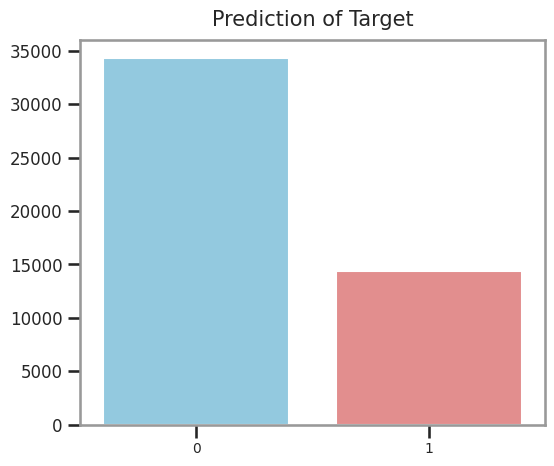

In [118]:
sns.countplot(x='TARGET', data=test_ros, palette=['skyblue', 'lightcoral'])
plt.title("Prediction of Target", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

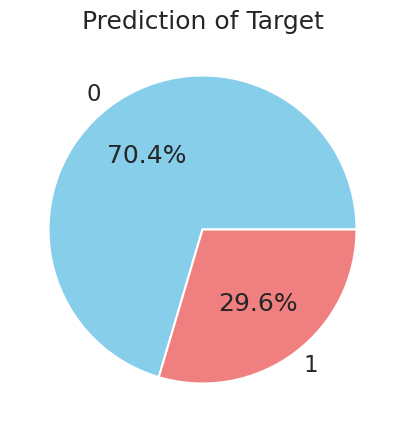

In [119]:
test_ros.TARGET.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Prediction of Target')
plt.ylabel(None)
plt.show()

## Undersampling

In [121]:
predict = pd.Series(best_model_rus.predict(pred_data), name = "TARGET").astype(int)
test_rus = pd.concat([data_test['SK_ID_CURR'], predict],axis = 1)
test_rus.head(15)

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,1
4,100038,1
5,100042,0
6,100057,0
7,100065,0
8,100066,0
9,100067,0


In [122]:
test_rus.TARGET.value_counts()

TARGET
0    30775
1    17969
Name: count, dtype: int64

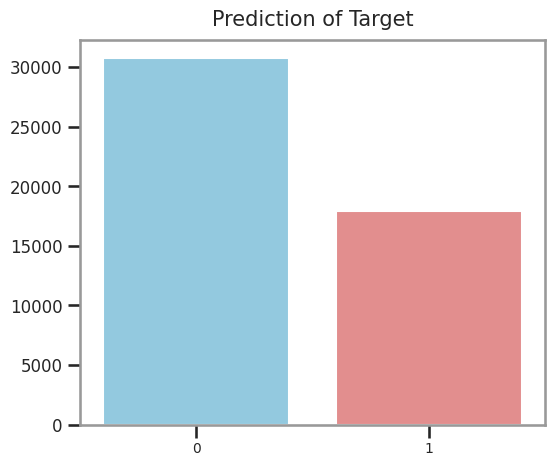

In [123]:
sns.countplot(x='TARGET', data=test_rus, palette=['skyblue', 'lightcoral'])
plt.title("Prediction of Target", loc="center", fontsize=15, pad=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=12)
plt.show()

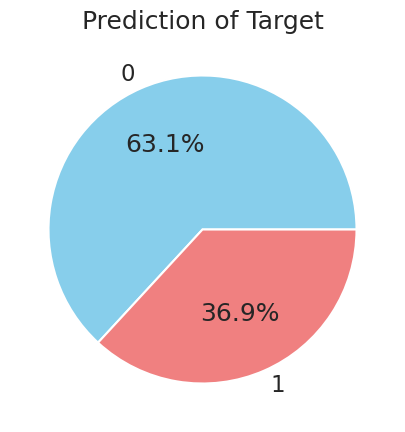

In [124]:
test_rus.TARGET.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Prediction of Target')
plt.ylabel(None)
plt.show()

From the results of testing the new data from the KNN Oversampling and Undersampling models using test data to predict, which initially did not have the label “TARGET”, the results were obtained:


* Oversampling: 70% predict customers who successfully pay, and 30% are customers who fail to pay.
* Undersampling: 63% predicted customers who successfully made a payment, and 37% were customers who failed to pay.